In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def readucr(filename):
    data = np.loadtxt(filename, delimiter=",")
    y = data[:, 0]
    x = data[:, 1:]
    return x, y.astype(int)

x_train, y_train = readucr("/content/drive/MyDrive/train_filled.csv")
x_test, y_test = readucr("/content/drive/MyDrive/test_filled.csv")

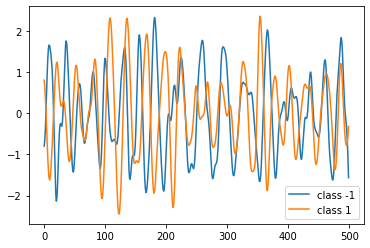

In [ ]:
classes = np.unique(np.concatenate((y_train, y_test), axis=0))

plt.figure()
for c in classes:
    c_x_train = x_train[y_train == c]
    plt.plot(c_x_train[0], label="class " + str(c))
plt.legend(loc="best")
plt.show()
plt.close()

In [ ]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

In [ ]:
num_classes = len(np.unique(y_train))
print(num_classes)

2


In [ ]:
idx = np.random.permutation(len(x_train))
x_train = x_train[idx]
y_train = y_train[idx]

In [ ]:
y_train[y_train == -1] = 0
y_test[y_test == -1] = 0

## Build a model

In [ ]:
input_layer = keras.layers.Input((500, 1))

conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
conv1 = keras.layers.BatchNormalization()(conv1)
conv1 = keras.layers.ReLU()(conv1)

conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
conv2 = keras.layers.BatchNormalization()(conv2)
conv2 = keras.layers.ReLU()(conv2)

conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
conv3 = keras.layers.BatchNormalization()(conv3)
conv3 = keras.layers.ReLU()(conv3)

gap = keras.layers.GlobalAveragePooling1D()(conv3)
output_layer = keras.layers.Dense(num_classes, activation="softmax")(gap)

model = keras.models.Model(inputs=input_layer, outputs=output_layer)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500, 1)]          0         
                                                                 
 conv1d (Conv1D)             (None, 500, 64)           256       
                                                                 
 batch_normalization (BatchN  (None, 500, 64)          256       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 500, 64)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 500, 64)           12352     
                                                                 
 batch_normalization_1 (Batc  (None, 500, 64)          256       
 hNormalization)                                             

## Train the model

In [ ]:
epochs = 500
batch_size = 32

callbacks = [
    keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=(x_test, y_test),
    verbose=1,
)

Epoch 1/500
113/113 [==============================] - 13s 11ms/step - loss: 0.5264 - sparse_categorical_accuracy: 0.7256 - val_loss: 0.8703 - val_sparse_categorical_accuracy: 0.4841 - lr: 0.0010
Epoch 2/500
113/113 [==============================] - 1s 8ms/step - loss: 0.4449 - sparse_categorical_accuracy: 0.7731 - val_loss: 0.9116 - val_sparse_categorical_accuracy: 0.4841 - lr: 0.0010
Epoch 3/500
113/113 [==============================] - 1s 8ms/step - loss: 0.4297 - sparse_categorical_accuracy: 0.7870 - val_loss: 0.9033 - val_sparse_categorical_accuracy: 0.4841 - lr: 0.0010
Epoch 4/500
113/113 [==============================] - 1s 8ms/step - loss: 0.4176 - sparse_categorical_accuracy: 0.7887 - val_loss: 0.5118 - val_sparse_categorical_accuracy: 0.8000 - lr: 0.0010
Epoch 5/500
113/113 [==============================] - 1s 9ms/step - loss: 0.4144 - sparse_categorical_accuracy: 0.7920 - val_loss: 0.6547 - val_sparse_categorical_accuracy: 0.6386 - lr: 0.0010
Epoch 6/500
113/113 [=======

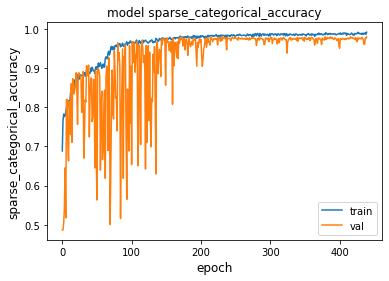

In [ ]:
metric = "sparse_categorical_accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()